<a href="https://colab.research.google.com/github/ashwanimsajeev/ashwanims/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up Google Colab and Required Libraries




In [1]:
!pip install easyocr opencv-python-headless transformers torch torchvision torchaudio spacy nltk scikit-learn pandas
!python -m spacy download en_core_web_sm  # Download NLP model for spaCy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

# Implement Handwriting Recognition (OCR) Using EasyOCR

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

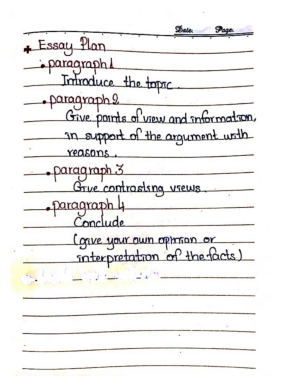

Detected text: +Essay_Plon (Confidence: 0.38)
Detected text: ~xparagraphL (Confidence: 0.44)
Detected text: Iniroduce_ (Confidence: 0.25)
Detected text: ~_Aparagraph ? (Confidence: 0.20)
Detected text: Give_pornts_dview_and_infrmalin, (Confidence: 0.38)
Detected text: ~in_suppodt_of' the_axgument_uzlh  (Confidence: 0.12)
Detected text: _Yeasons _ (Confidence: 0.22)
Detected text: ~arag (Confidence: 0.97)
Detected text: Gue_contrasling_VieWus (Confidence: 0.26)
Detected text: ~{pragraph y (Confidence: 0.19)
Detected text: Conclude (Confidence: 0.98)
Detected text: your_oln_Okirnon_or (Confidence: 0.13)
Detected text: interpretatin (Confidence: 0.63)
Detected text: thetacts (Confidence: 0.40)
Detected text: Sale (Confidence: 0.87)
Detected text: 90ge (Confidence: 0.04)
Detected text: #he_topic (Confidence: 0.18)
Detected text: aph Z (Confidence: 0.74)
Detected text: Lgie (Confidence: 0.91)
Detected text: o (Confidence: 0.21)


In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# Initialize OCR reader
reader = easyocr.Reader(['en'])

# Load and display an image
image_path = "sample.jpg"  # Upload a sample handwritten answer sheet
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Perform OCR
results = reader.readtext(image)

# Print extracted text
for (bbox, text, prob) in results:
    print(f"Detected text: {text} (Confidence: {prob:.2f})")


# Preprocess the Extracted Text i.e Cleaning the OCR Output

In [3]:
import re
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    doc = nlp(text)
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop])  # Lemmatization & stopword removal
    return processed_text

# Example usage
raw_text = "Give points and view."
clean_text = preprocess_text(raw_text)
print(clean_text)


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


point view
